       batting_avg        ab       hit  home_run  strikeout      walk
count    1,233.000 1,233.000 1,233.000 1,233.000  1,233.000 1,233.000
mean         0.265   500.163   133.205    20.743    112.680    50.688
std          0.029   120.275    36.732    10.346     38.986    22.237
min          0.168   154.000    32.000     0.000     12.000     5.000
25%          0.247   479.000   120.000    13.000     87.000    35.000
50%          0.264   528.000   138.000    20.000    114.000    49.000
75%          0.283   575.000   157.000    28.000    140.000    64.000
max          0.364   681.000   217.000    62.000    219.000   145.000


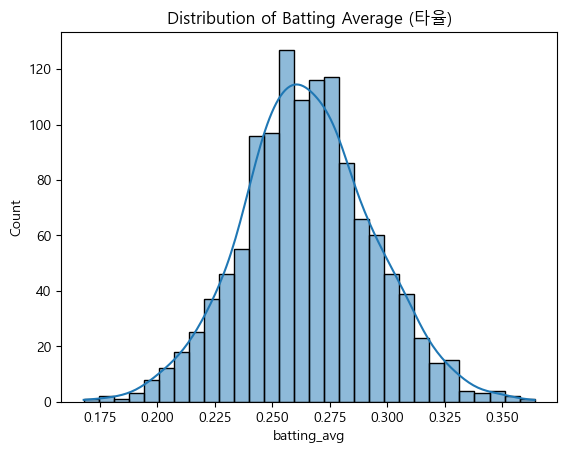

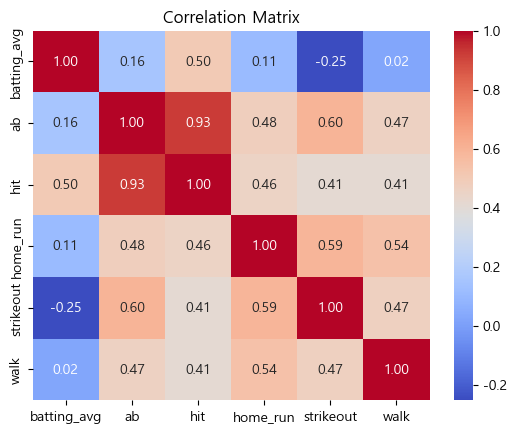

One or both variables are not normally distributed (reject H0).


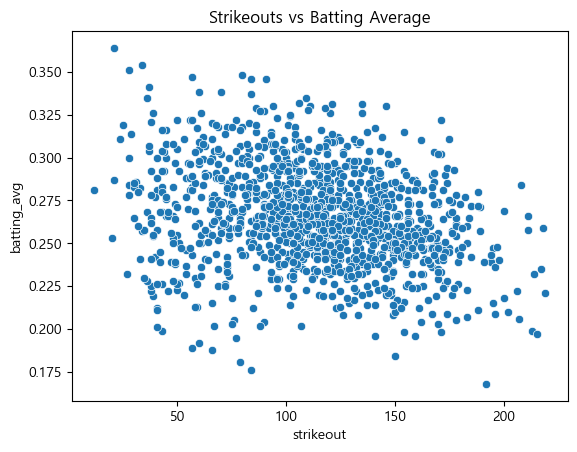

Pearson correlation between strikeouts and batting average: -0.25309053668812564, p-value: 1.7909069498603545e-19

Interesting Insights:
1. Batting average shows a correlation with strikeouts, suggesting players with fewer strikeouts may have higher averages.
2. The regression model indicates that home runs, strikeouts, and walks significantly predict batting average.
3. Mean Squared Error for model: 0.0007031447754268297

Expected Batting Averages for Players:
           player_name  expected_batting_avg
0         Ortiz, David                 0.294
1       Beltré, Adrian                 0.293
2      Beltrán, Carlos                 0.277
3        Werth, Jayson                 0.257
4     Martinez, Victor                 0.280
...                ...                   ...
1228  Chourio, Jackson                 0.262
1229   Schanuel, Nolan                 0.262
1230   Langford, Wyatt                 0.260
1231      Young, Jacob                 0.250
1232  Merrill, Jackson                 

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import warnings
from matplotlib import font_manager

df = pd.read_csv('../stats.csv')
# EDA
print(df[['batting_avg', 'ab', 'hit', 'home_run', 'strikeout', 'walk']].describe())

sns.histplot(df['batting_avg'], kde=True)
plt.title('Distribution of Batting Average (타율)')
plt.show()

# Correlation matrix
corr_matrix = df[['batting_avg', 'ab', 'hit', 'home_run', 'strikeout', 'walk']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Hypothesis Testing
# H0: There is no significant relationship
# Ha: There is a significant relationship


_, p_value_strikeout = stats.shapiro(df['strikeout'])
_, p_value_batting_avg = stats.shapiro(df['batting_avg'])


if p_value_strikeout > 0.05 and p_value_batting_avg > 0.05:
    print('Both Strikeouts and Batting Average are normally distributed (fail to reject H0).')
else:
    print('One or both variables are not normally distributed (reject H0).')

sns.scatterplot(x=df['strikeout'], y=df['batting_avg'])
plt.title('Strikeouts vs Batting Average')
plt.show()

# Pearson correlation test
correlation, p_value = stats.pearsonr(df['strikeout'], df['batting_avg'])
print(f'Pearson correlation: {correlation}, p-value: {p_value}')

# Regression Analysis
X = df[['home_run', 'strikeout', 'walk']]
y = df['batting_avg']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

#Interesting facts
print('\nInteresting Insights:')
print('1. Batting average shows a correlation with strikeouts, suggesting players with fewer strikeouts may have higher averages.')
print('2. The regression model indicates that home runs, strikeouts, and walks significantly predict batting average.')
print(f'3. Mean Squared Error for model: {mse}')

df['expected_batting_avg'] = model.predict(df[['home_run', 'strikeout', 'walk']])
df[['last_name', 'first_name']] = df['last_name, first_name'].str.split(', ', expand=True)
df['player_name'] = df['last_name'] + ', ' + df['first_name']
expected_batting_avg_table = df[['player_name', 'expected_batting_avg']].round({'expected_batting_avg': 3})

print('\nExpected Batting Averages for Players:')
print(expected_batting_avg_table)


       batting_avg        ab       hit  home_run  strikeout      walk
count    1,233.000 1,233.000 1,233.000 1,233.000  1,233.000 1,233.000
mean         0.265   500.163   133.205    20.743    112.680    50.688
std          0.029   120.275    36.732    10.346     38.986    22.237
min          0.168   154.000    32.000     0.000     12.000     5.000
25%          0.247   479.000   120.000    13.000     87.000    35.000
50%          0.264   528.000   138.000    20.000    114.000    49.000
75%          0.283   575.000   157.000    28.000    140.000    64.000
max          0.364   681.000   217.000    62.000    219.000   145.000


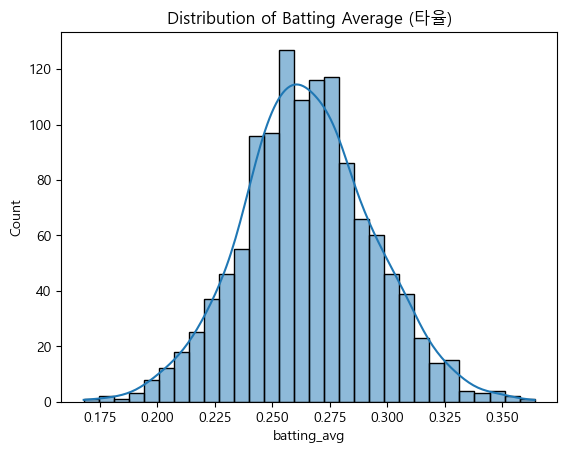

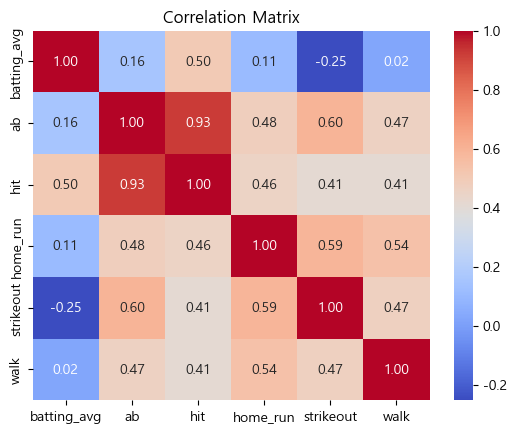

One or both variables are not normally distributed (reject H0).


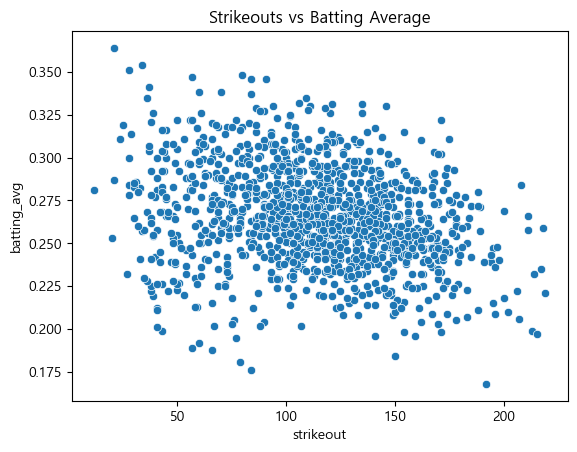

Pearson correlation: -0.25309053668812564, p-value: 1.7909069498603545e-19

Interesting Insights:
1. Batting average shows a correlation with strikeouts, suggesting players with fewer strikeouts may have higher averages.
2. The regression model indicates that home runs, strikeouts, and walks significantly predict batting average.
3. Mean Squared Error for model: 0.0007031447754268297

Expected Batting Averages for Players:
           player_name  expected_batting_avg
0         Ortiz, David                 0.294
1       Beltré, Adrian                 0.293
2      Beltrán, Carlos                 0.277
3        Werth, Jayson                 0.257
4     Martinez, Victor                 0.280
...                ...                   ...
1228  Chourio, Jackson                 0.262
1229   Schanuel, Nolan                 0.262
1230   Langford, Wyatt                 0.260
1231      Young, Jacob                 0.250
1232  Merrill, Jackson                 0.271

[1233 rows x 2 columns]
